In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1102/2874048267.py:73: RuntimeWarning: invalid value encountered in sqrt
  y6 = np.sqrt(y5)
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1102/2874048267.py:74: RuntimeWarning: invalid value encountered in sqrt
  y6errsym = y5errsym/(2*np.sqrt(y5))


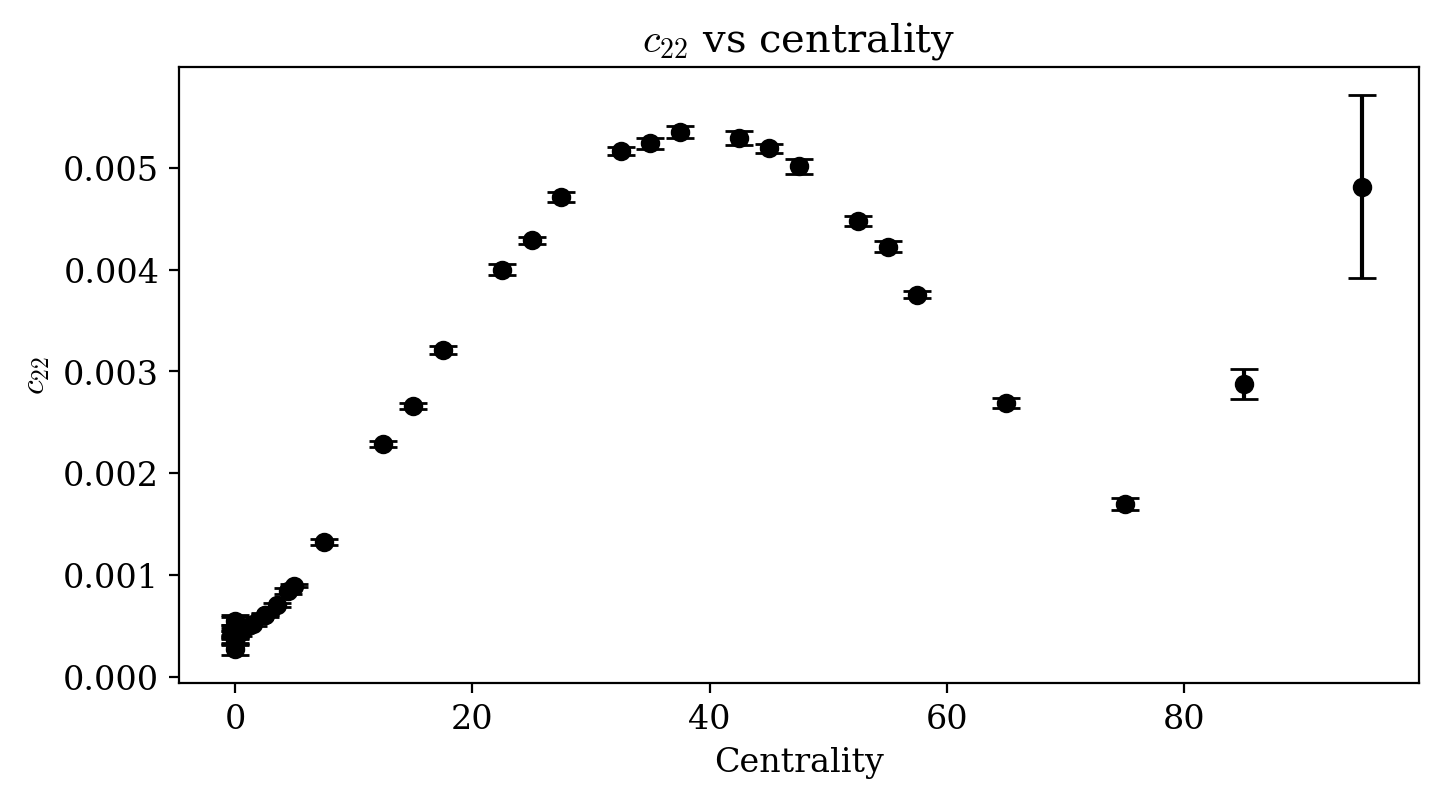

In [5]:
filepath = "/Users/christianschmidt/Desktop/trajectum-2.1/src/40k_200GeV_AuAu.h5"
c22 = "v2cumulantsc2/STARTPC/centralitybinned/values"
c24 = "v2cumulantsc4/STARTPC/centralitybinned/values"
c32 = "v3cumulantsc2/STARTPC/centralitybinned/values"
c22uerr = "v2cumulantsc2/STARTPC/centralitybinned/uppererrors"
c22lerr = "v2cumulantsc2/STARTPC/centralitybinned/lowererrors"
c24uerr = "v2cumulantsc4/STARTPC/centralitybinned/uppererrors"
c24lerr = "v2cumulantsc4/STARTPC/centralitybinned/lowererrors"
c32uerr = "v3cumulantsc2/STARTPC/centralitybinned/uppererrors"
c32lerr = "v3cumulantsc2/STARTPC/centralitybinned/lowererrors"
centralitydir = "centrality"
multiplicitychargeddir = "multiplicitycharged/STARTPC/centralitybinned/values"

with h5py.File(filepath, "r") as hdf:
    if c22 in hdf:
        c22data = hdf[c22][:]
        c22usigdata=hdf[c22uerr][:]
        c22lsigdata=hdf[c22lerr][:]
        c24data = hdf[c24][:]
        c24usigdata=hdf[c24uerr][:]
        c24lsigdata=hdf[c24lerr][:]
        c32data = hdf[c32][:]
        c32usigdata=hdf[c32uerr][:]
        c32lsigdata=hdf[c32lerr][:]
        centrality=hdf[centralitydir][:]
        multiplicitycharged=hdf[multiplicitychargeddir][:]

    else:
        print(f"Dataset '{c22}' not found.")
        exit()

#using the centrality as the x axis. Note that it is the middle value of the bin!!!

x = centrality
xalt = multiplicitycharged[:,0]

#c22
y1 = c22data[:,0]
y1uerr = c22usigdata[:,0]
y1lerr = c22usigdata[:,0]
y1errsym = 0.5*(y1lerr + y1uerr)

#v22
y2 = np.sqrt(y1)
y2errsym = y1errsym/(2*np.sqrt(y1))

#c24
y3 = c24data[:,0]
y3uerr = c24usigdata[:,0]
y3lerr = c24lsigdata[:,0]
#mask for only negative values
negative_mask = y3 < 0

y3 = y3[negative_mask]
y3uerr = y3uerr[negative_mask]
y3lerr = y3lerr[negative_mask]
x3 = x[negative_mask]
xalt_3 = xalt[negative_mask]

y3errsym = 0.5 * (y3uerr + y3lerr)

#v24
y4 = (np.abs(y3)) ** 0.25
y4errsym = y3errsym / (4 * (np.abs(y3) ** 0.75))

#c32
y5 = c32data[:,0]
y5uerr = c32usigdata[:,0]
y5lerr = c32usigdata[:,0]
y5errsym = 0.5*(y5lerr + y5uerr)

#v22
y6 = np.sqrt(y5)
y6errsym = y5errsym/(2*np.sqrt(y5))


plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.errorbar(x,y1,yerr=[y1uerr,y1lerr[:]], fmt="o", capsize=5, color="black")
plt.title("$c_{{22}}$ vs centrality")
plt.xlabel("Centrality")
plt.ylabel("$c_{{22}}$")
plt.show()

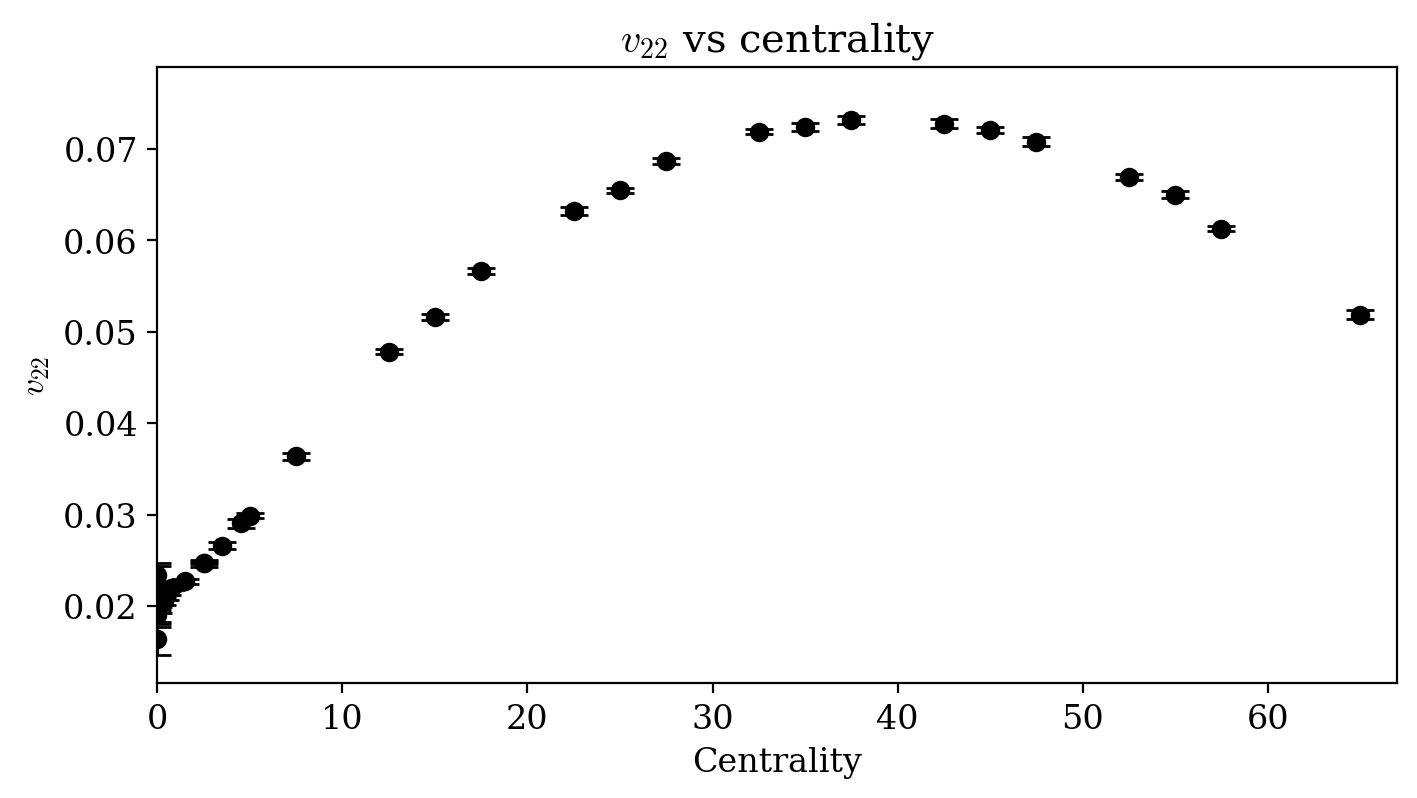

In [68]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.errorbar(x,y2,yerr=y2errsym, fmt="o", capsize=5, color="black")
plt.title("$v_{{22}}$ vs centrality")
plt.xlabel("Centrality")
plt.ylabel("$v_{{22}}$")
plt.xlim([0,67])
#plt.ylim([0,0.07])
plt.show()

In [ ]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.errorbar(xalt,y1,yerr=[y1uerr,y1lerr[:]], fmt="o", capsize=5, color="black")
plt.title("$c_{{22}}$ vs $N_{{ch}}$")
plt.xlabel("$N_{{ch}}$")
plt.ylabel("$c_{{22}}$")
plt.show()

In [ ]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.errorbar(xalt,y2,yerr=y2errsym, fmt="o", capsize=5, color="black")
plt.title("$v_{{22}}$ vs $N_{{ch}}$")
plt.xlabel("$N_{{ch}}$")
plt.ylabel("$v_{{22}}$")
plt.show()

In [ ]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.errorbar(x3,y3,yerr=[y3uerr,y3lerr[:]], fmt="o", capsize=5, color="black")
plt.title("$c_{{24}}$ vs centrality")
plt.xlabel("Centrality")
plt.ylabel("$c_{{24}}$")
plt.show()

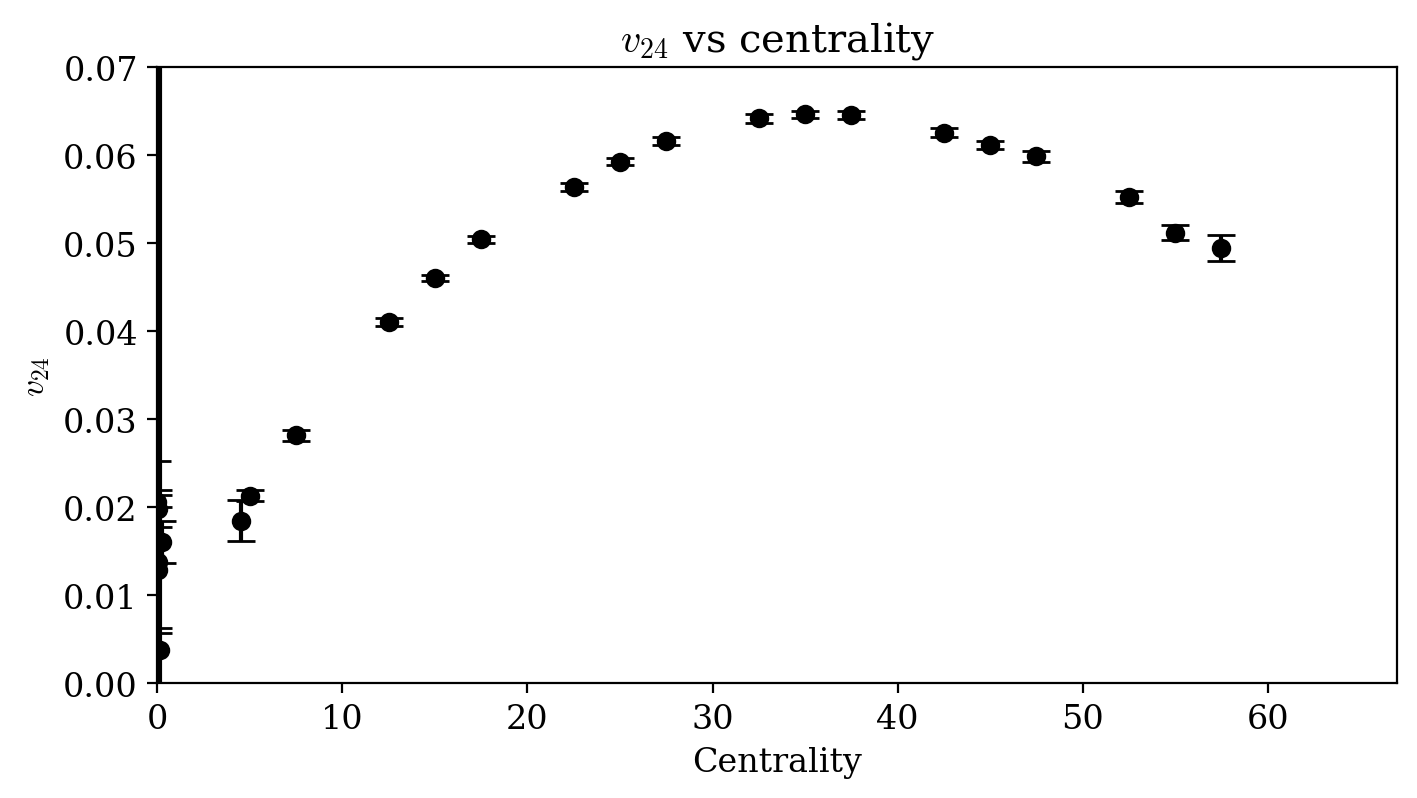

In [65]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.errorbar(x3,y4,yerr=y4errsym, fmt="o", capsize=5, color="black")
plt.title("$v_{{24}}$ vs centrality")
plt.xlabel("Centrality")
plt.ylabel("$v_{{24}}$")
plt.xlim([0,67])
plt.ylim([0,0.07])
plt.show()

In [ ]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.errorbar(x,y5,yerr=[y5uerr,y5lerr], fmt="o", capsize=5, color="black")
plt.title("$c_{{32}}$ vs centrality")
plt.xlabel("Centrality")
plt.ylabel("$c_{{32}}$")
plt.show()

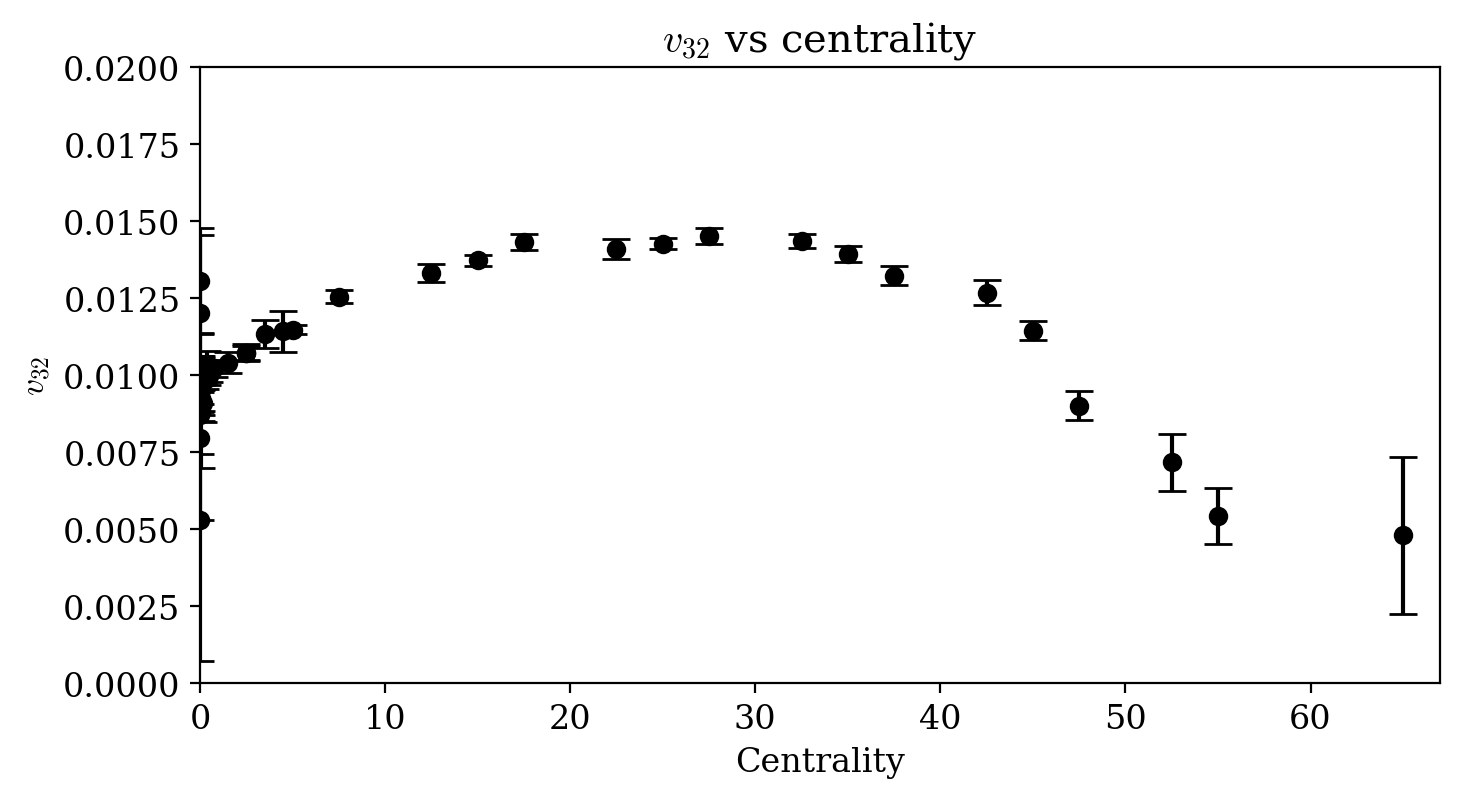

In [59]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.errorbar(x,y6,yerr=y6errsym, fmt="o", capsize=5, color="black")
plt.title("$v_{{32}}$ vs centrality")
plt.xlabel("Centrality")
plt.ylabel("$v_{{32}}$")
plt.xlim([0,67])
plt.ylim([0,0.02])
plt.show()

Text(0.5, 1.0, '$v_n$ vs. Centrality')

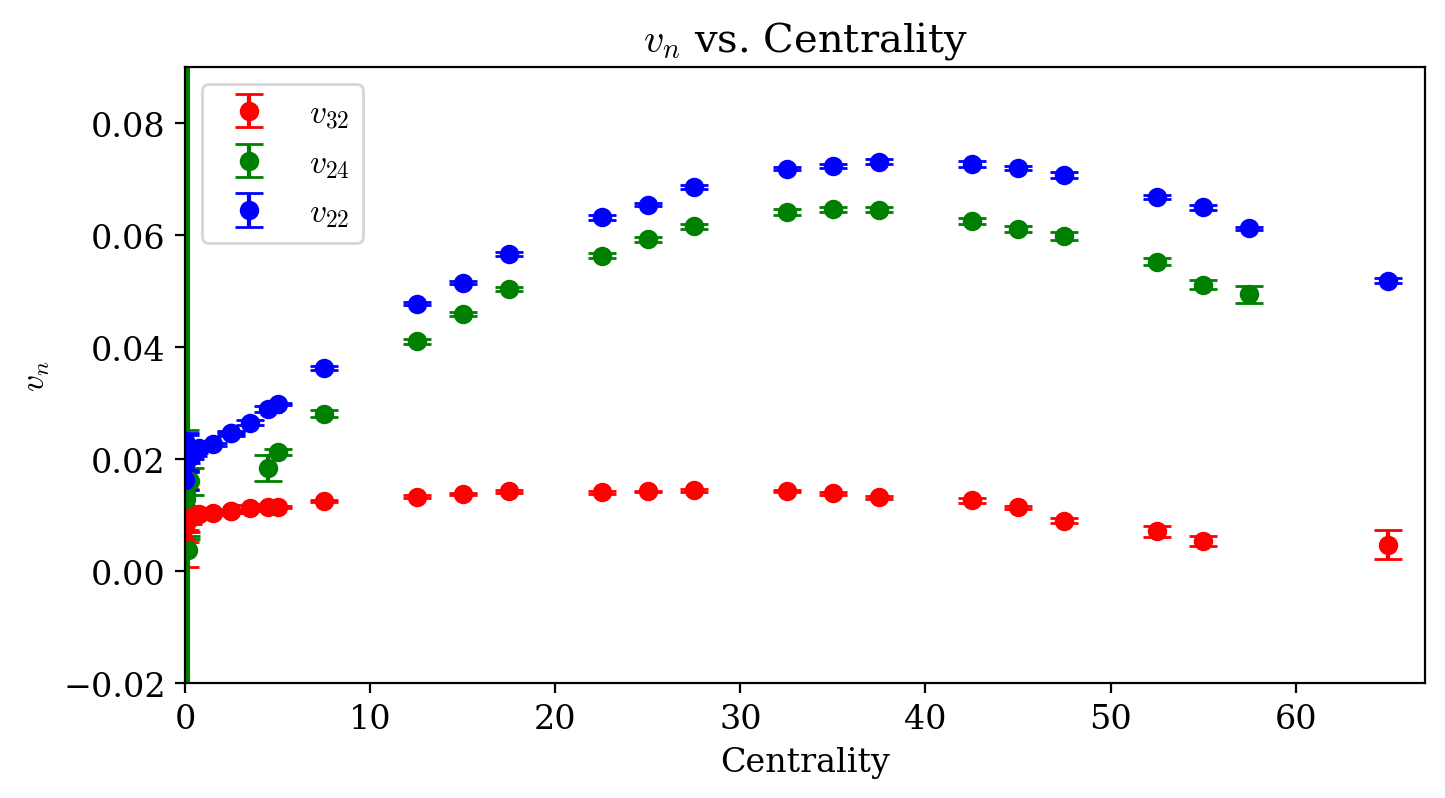

In [72]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.errorbar(x,y6,yerr=y6errsym, fmt="o", capsize=5, color="red", label="$v_{{32}}$")
plt.errorbar(x3,y4,yerr=y4errsym, fmt="o", capsize=5, color="green", label="$v_{{24}}$")
plt.errorbar(x,y2,yerr=y2errsym, fmt="o", capsize=5, color="blue", label="$v_{{22}}$")
plt.legend()
plt.xlim([0,67])
plt.ylim([-0.02,0.09])
plt.xlabel("Centrality")
plt.ylabel("$v_n$")
plt.title("$v_n$ vs. Centrality")

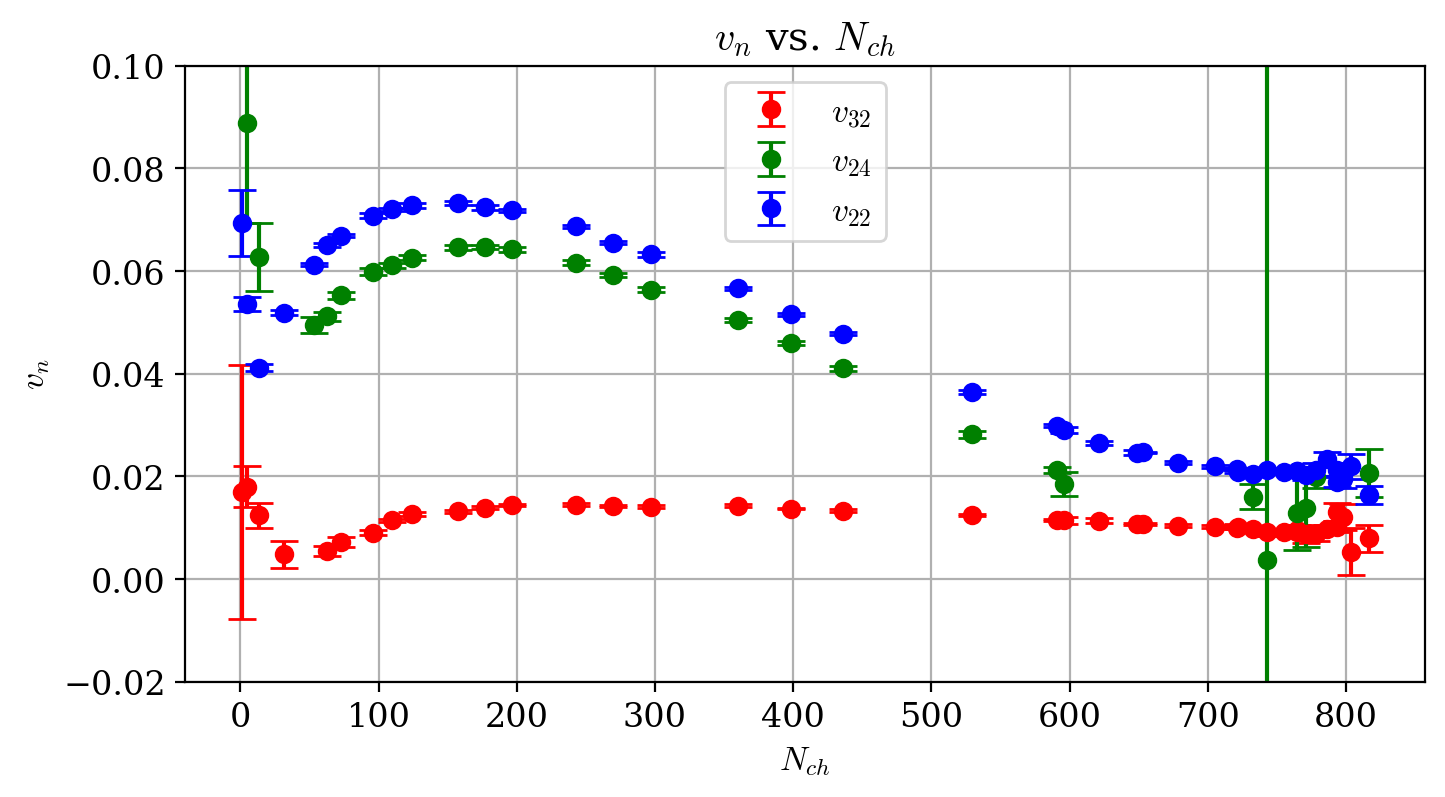

In [6]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)
plt.errorbar(xalt,y6,yerr=y6errsym, fmt="o", capsize=5, color="red", label="$v_{{32}}$")
plt.errorbar(xalt_3,y4,yerr=y4errsym, fmt="o", capsize=5, color="green", label="$v_{{24}}$")
plt.errorbar(xalt,y2,yerr=y2errsym, fmt="o", capsize=5, color="blue", label="$v_{{22}}$")
plt.legend()
plt.xlabel("$N_{{ch}}$")
plt.ylabel("$v_n$")
plt.title("$v_n$ vs. $N_{{ch}}$")
plt.ylim([-0.02,0.1])
plt.grid()